# Introdução a análise de dados com Pandas
## Trabalhando com chaves primárias e secundárias

Em situações reais, informações costumam estar separadas em diferentes tabelas. Com o uso de chaves primárias e secundárias, é possível combinar tabelas para atingir um objetivo específico. Para exemplificar o uso de combinações de tabelas, utilizaremos as informações contidas nos arquivos ```pessoas.csv```, ```cursos.csv``` e ```pessoas_cursos.csv```.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pessoas = pd.read_csv('dados/pessoas.csv')
cursos = pd.read_csv('dados/cursos.csv')
pessoas_cursos = pd.read_csv('dados/pessoas_cursos.csv')

O arquivo ```pessoas.csv``` contém o ```id```, ```nome``` e a ```idade``` de pessoas.

In [3]:
pessoas

,id,nome,idade
0,0,Nome 1,12
1,1,Nome 2,15
2,2,Nome 3,22
3,3,Nome 4,21
4,4,Nome 5,32
5,5,Nome 6,33
6,6,Nome 7,25


O arquivo ```cursos.csv``` contém o ```id```, ```nome``` e o ```semestre``` de cursos.

In [4]:
cursos

,id,nome_curso,semestre
0,0,C1,1
1,1,C2,2
2,2,C3,1
3,3,C4,3
4,4,C5,4
5,5,C6,3
6,6,C7,2
7,7,C8,5
8,8,C9,4
9,9,C10,3


O arquivo ```pessoas_cursos.csv``` contém o ```id_pessoa``` e o ```id_curso```, relacionando cada pessoa com diferentes cursos. O ```id_pessoa``` representa o ```id``` presente no arquivo ```pessoas.csv``` e o ```id_curso``` representa o ```id``` presente no arquivo ```cursos.csv```.

In [7]:
pessoas_cursos.head(10)

,id_pessoa,id_curso
0,0,1
1,0,3
2,0,4
3,0,6
4,0,7
5,1,2
6,1,1
7,1,3
8,2,8
9,2,7


Para gerarmos um ```DataFrame``` contendo todas as informações contida nos três arquivos, utilizaremos o comando ```DataFrame.join()```. O comando ```join()``` recebe como parâmetro o ```DataFrame``` a ser agregado, fazendo a junção com base nos indices dos dois ```DataFrame```. Podemos passar o parâmetro ```on='nome_da_coluna'``` para especificar a coluna de referência do ```DataFrame``` agregador.

Como o arquivo ```pessoas_cursos.csv``` relaciona os outros dois arquivos, utilizaremos ele para fazer a junção. Para tanto, precisamos garantir que o índice do ```DataFrame``` a ser agregado seja igual a coluna de referência do ```DataFrame``` agregador. Para isso, utilizaremos o comando ```DataFrame.set_index()```.

In [10]:
pessoas_cursos.join(pessoas.set_index('id'), on='id_pessoa').head()

,id_pessoa,id_curso,nome,idade
0,0,1,Nome 1,12
1,0,3,Nome 1,12
2,0,4,Nome 1,12
3,0,6,Nome 1,12
4,0,7,Nome 1,12


Guardaremos o novo ```DataFrame``` em uma variável denominada ```df1```.

In [12]:
df1 = pessoas_cursos.join(pessoas.set_index('id'), on='id_pessoa')

Faremos agora a agregação das informações contidas no arquivo ```cursos.csv```, guardando o resultado em uma variável denominada ```df2```.

In [15]:
df2 = df1.join(cursos.set_index('id'), on='id_curso')
df2.head()

,id_pessoa,id_curso,nome,idade,nome_curso,semestre
0,0,1,Nome 1,12,C2,2
1,0,3,Nome 1,12,C4,3
2,0,4,Nome 1,12,C5,4
3,0,6,Nome 1,12,C7,2
4,0,7,Nome 1,12,C8,5


Com o novo ```DataFrame``` criado, podemos responder perguntas como:
* Número de alunos matriculados em cada semestre

<BarContainer object of 6 artists>

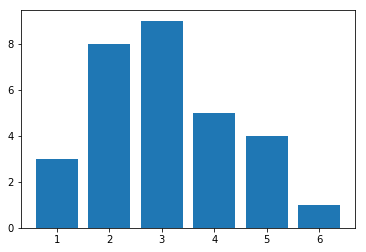

In [17]:
semestres = df2.semestre.value_counts()
plt.bar(semestres.index, semestres.values)